In [1]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

import numpy as np
import pandas as pd
import seaborn as sns
from utils import *

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

### I. Identify the attribute type of each attribute in your dataset

In [3]:
missing_values = ['?', '.', '', ' ', '_', 'Na', 'NULL', 'null', 'not', 'Not', 'NaN', 'NA', '??', 'nan', 'inf']
raw_data = pd.read_csv('32130_AT2_25076833.csv', na_values=missing_values)
raw_data = raw_data.loc[:, ~raw_data.columns.str.contains('^Unnamed|Source')] # Drop 3 unnecessary columns
print('Number of entries:', raw_data.shape[0])
print('Number of attributes:', raw_data.shape[1])

Number of entries: 3000
Number of attributes: 26


In [4]:
import io
buffer = io.StringIO() # Create a buffer to hold the output and capture the info of DataFrame into a string
raw_data.info(buf=buffer) # Check data types and missing values and
info_str = buffer.getvalue().replace("<class 'pandas.core.frame.DataFrame'>\n", '')

display_html(f"""
    <div style='width:30%; float: left; overflow-x: auto;'>
        <pre>{info_str}</pre>
    </div>
    <div style='width:70%; float: right; overflow-x: auto;'>
        {raw_data.head(15).round(2).to_html()}
    </div>
""", raw=True) # Display the info and head side by side

RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 RA_ICRS 3000 non-null float64
 1 DE_ICRS 3000 non-null float64
 2 Plx 3000 non-null float64
 3 PM 3000 non-null float64
 4 pmRA 3000 non-null float64
 5 pmDE 3000 non-null float64
 6 Gmag 3000 non-null float64
 7 e_Gmag 3000 non-null float64
 8 BPmag 3000 non-null float64
 9 e_BPmag 3000 non-null float64
 10 RPmag 3000 non-null float64
 11 e_RPmag 3000 non-null float64
 12 GRVSmag 1706 non-null float64
 13 e_GRVSmag 1706 non-null float64
 14 BP-RP 3000 non-null float64
 15 BP-G 3000 non-null float64
 16 G-RP 3000 non-null float64
 17 pscol 96 non-null float64
 18 Teff 3000 non-null float64
 19 Dist 3000 non-null float64
 20 Rad 3000 non-null float64
 21 Lum-Flame 2960 non-null float64
 22 Mass-Flame 2747 non-null float64
 23 Age-Flame 2237 non-null float64
 24 z-Flame 2960 non-null float64
 25 SpType-ELS 3000 non-null object 
dtypes: float64(25), object(1)
memory usage: 609.5+ KB
 
 
 
 
 
 
 
 RA_ICRS 
 DE_ICRS 
 Plx 
 PM 
 pmRA 
 pmDE 
 Gmag 
 e_Gmag 
 BPmag 
 e_BPmag 
 RPmag 
 e_RPmag 
 GRVSmag 
 e_GRVSmag 
 BP-RP 
 BP-G 
 G-RP 
 pscol 
 Teff 
 Dist 
 Rad 
 Lum-Flame 
 Mass-Flame 
 Age-Flame 
 z-Flame 
 SpType-ELS 
 
 
 
 
 0 
 294.86 
 27.61 
 1.38 
 5.14 
 -0.36 
 -5.12 
 11.97 
 0.0 
 12.24 
 0.00 
 11.54 
 0.00 
 11.34 
 0.03 
 0.70 
 0.27 
 0.43 
 NaN 
 7851.6 
 679.66 
 1.92 
 13.68 
 1.80 
 0.87 
 0.49 
 A 
 
 
 1 
 115.98 
 -1.11 
 0.44 
 4.81 
 -1.85 
 4.44 
 13.77 
 0.0 
 13.98 
 0.00 
 13.44 
 0.00 
 13.29 
 0.06 
 0.54 
 0.20 
 0.33 
 NaN 
 7343.8 
 1618.97 
 1.76 
 13.38 
 1.75 
 1.19 
 0.49 
 A 
 
 
 2 
 109.54 
 -9.00 
 0.41 
 4.87 
 -4.31 
 2.27 
 13.93 
 0.0 
 14.24 
 0.00 
 13.45 
 0.00 
 13.12 
 0.14 
 0.79 
 0.31 
 0.48 
 NaN 
 9361.0 
 1807.66 
 2.01 
 43.70 
 2.37 
 0.44 
 0.76 
 A 
 
 
 3 
 69.50 
 45.44 
 0.19 
 0.80 
 0.42 
 -0.68 
 16.42 
 0.0 
 17.02 
 0.01 
 15.65 
 0.00 
 NaN 
 NaN 
 1.36 
 0.60 
 0.77 
 NaN 
 9874.7 
 3647.48 
 2.13 
 41.12 
 2.39 
 0.32 
 0.50 
 B 
 
 
 4 
 30.57 
 65.34 
 0.01 
 0.38 
 -0.31 
 0.22 
 16.54 
 0.0 
 16.97 
 0.00 
 15.74 
 0.00 
 NaN 
 NaN 
 1.24 
 0.44 
 0.80 
 NaN 
 9624.8 
 2636.91 
 1.35 
 NaN 
 NaN 
 NaN 
 NaN 
 B 
 
 
 5 
 36.60 
 43.23 
 1.37 
 10.12 
 7.97 
 -6.24 
 11.68 
 0.0 
 11.83 
 0.00 
 11.40 
 0.00 
 11.27 
 0.02 
 0.43 
 0.15 
 0.28 
 NaN 
 7727.5 
 707.45 
 1.80 
 10.32 
 1.70 
 0.84 
 0.53 
 A 
 
 
 6 
 66.64 
 77.93 
 0.45 
 1.62 
 -1.13 
 1.17 
 16.80 
 0.0 
 16.75 
 0.01 
 16.81 
 0.01 
 NaN 
 NaN 
 -0.07 
 -0.05 
 -0.01 
 NaN 
 15663.8 
 12300.87 
 1.40 
 112.37 
 NaN 
 NaN 
 1.34 
 B 
 
 
 7 
 75.60 
 46.16 
 0.21 
 0.82 
 0.28 
 -0.78 
 12.73 
 0.0 
 12.90 
 0.00 
 12.43 
 0.00 
 NaN 
 NaN 
 0.48 
 0.17 
 0.31 
 NaN 
 14233.7 
 3675.73 
 4.44 
 1127.30 
 5.22 
 NaN 
 0.48 
 B 
 
 
 8 
 339.79 
 71.44 
 1.09 
 4.46 
 -3.54 
 -2.73 
 12.37 
 0.0 
 12.58 
 0.00 
 11.99 
 0.00 
 11.83 
 0.02 
 0.59 
 0.21 
 0.37 
 NaN 
 9326.4 
 1001.82 
 1.99 
 22.35 
 2.10 
 0.30 
 0.60 
 A 
 
 
 9 
 117.33 
 -14.11 
 1.27 
 4.22 
 -3.71 
 2.00 
 11.05 
 0.0 
 11.10 
 0.00 
 10.95 
 0.00 
 10.90 
 0.01 
 0.14 
 0.05 
 0.10 
 NaN 
 9140.1 
 981.65 
 2.47 
 24.13 
 2.11 
 0.40 
 0.54 
 A 
 
 
 10 
 20.72 
 64.07 
 0.44 
 0.85 
 -0.84 
 -0.16 
 14.16 
 0.0 
 14.78 
 0.00 
 13.39 
 0.00 
 NaN 
 NaN 
 1.39 
 0.62 
 0.77 
 NaN 
 15001.2 
 2587.93 
 3.47 
 365.19 
 4.29 
 NaN 
 0.76 
 B 
 
 
 11 
 39.63 
 54.68 
 0.46 
 1.57 
 0.24 
 -1.55 
 13.70 
 0.0 
 13.90 
 0.00 
 13.36 
 0.00 
 NaN 
 NaN 
 0.55 
 0.20 
 0.34 
 NaN 
 10194.3 
 2531.50 
 2.53 
 40.89 
 2.43 
 0.24 
 0.52 
 B 
 
 
 12 
 106.52 
 -20.71 
 1.25 
 16.64 
 -4.34 
 16.07 
 11.45 
 0.0 
 11.60 
 0.00 
 11.19 
 0.00 
 11.08 
 0.01 
 0.42 
 0.15 
 0.27 
 NaN 
 7297.3 
 720.38 
 2.08 
 12.93 
 1.74 
 1.20 
 0.43 
 A 
 
 
 13 
 17.43 
 63.01 
 0.25 
 1.61 
 -1.54 
 -0.46 
 15.08 
 0.0 
 15.72 
 0.00 
 14.29 
 0.00 
 NaN 
 NaN 
 1.44 
 0.64 
 0.80 
 NaN 
 9664.5 
 718

### II. For each attribute, conduct the below studies for each of them: 
- Identify the values of the summarising properties for the attributes, including frequency, location and spread (e.g., value ranges of the attributes, frequency of values, distributions, medians, means, variances, percentiles, etc. - identify as many statistics as possible). 
- Note that not all these summary statistics will make sense for all the attribute types, so use your judgment! Where necessary, use proper visualizations for the corresponding statistics.


In [7]:
X = raw_data.drop(['SpType-ELS'], axis=1) # Set X to all columns except the target
Y = raw_data['SpType-ELS'].str.strip().str.upper() # Set Y to the target column
stats_summary(raw_data).round(2)

count     mean      std      min      25%      50%       75%  \
RA_ICRS     3000.0   125.90   117.06     0.06    35.59    77.16    275.96   
DE_ICRS     3000.0    42.26    23.40   -36.84    34.58    48.33     59.76   
Plx         3000.0     0.91     1.10    -1.18     0.29     0.58      1.20   
PM          3000.0     4.34     6.28     0.04     1.35     2.61      5.25   
pmRA        3000.0    -0.57     5.26   -85.96    -2.08    -0.63      0.54   
pmDE        3000.0    -2.00     5.13   -98.09    -3.20    -1.10     -0.20   
Gmag        3000.0    13.16     2.17     4.02    11.64    13.21     14.84   
e_Gmag      3000.0     0.00     0.00     0.00     0.00     0.00      0.00   
BPmag       3000.0    13.46     2.31     3.95    11.81    13.48     15.30   
e_BPmag     3000.0     0.00     0.00     0.00     0.00     0.00      0.00   
RPmag       3000.0    12.71     2.03     4.09    11.35    12.75     14.20   
e_RPmag     3000.0     0.00     0.00     0.00     0.00     0.00      0.00   
GRVSmag     1706.0    11.41     1.49     4.88    10.62    11.45     12.44   
e_GRVSmag   1706.0     0.04     0.05     0.00     0.01     0.02      0.04   
BP-RP       3000.0     0.74     0.43    -0.37     0.43     0.67      1.00   
BP-G        3000.0     0.30     0.20    -0.30     0.15     0.25      0.40   
G-RP        3000.0     0.45     0.23    -0.25     0.28     0.42      0.60   
pscol         96.0     1.61     0.09     1.38     1.58     1.62      1.67   
Teff        3000.0  9546.62  2307.55  5341.50  7714.28  9381.05  10386.80   
Dist        3000.0  2320.36  2088.68    50.11   832.86  1726.13   3396.06   
Rad         3000.0     2.81     1.58     0.95     1.90     2.39      3.26   
Lum-Flame   2960.0    95.69   255.46     1.40    15.00    33.28     77.04   
Mass-Flame  2747.0     2.42     0.80     1.36     1.83     2.28      2.73   
Age-Flame   2237.0     0.63     0.35     0.20     0.34     0.52      0.90   
z-Flame     2960.0     0.54     0.16     0.17     0.44     0.51      0.61   

                 max    variance  iqr_size  skewness  kurtosis  nulls_count  \
RA_ICRS       359.96    13702.79    240.38      0.89     -0.86            0   
DE_ICRS        86.32      547.75     25.18     -1.16      0.62            0   
Plx            20.32        1.21      0.90      5.37     56.70            0   
PM            129.52       39.46      3.91      8.03    110.98            0   
pmRA           87.00       27.62      2.62     -0.72     75.39            0   
pmDE           40.45       26.35      3.00     -5.76     97.94            0   
Gmag           17.65        4.72      3.20     -0.26     -0.33            0   
e_Gmag          0.01        0.00      0.00     16.57    357.34            0   
BPmag          18.53        5.32      3.49     -0.24     -0.42            0   
e_BPmag         0.06        0.00      0.00      9.29    134.83            0   
RPmag          17.79        4.11      2.85     -0.25     -0.20            0   
e_RPmag         0.03        0.00      0.00      8.12     87.33            0   
GRVSmag        14.04        2.23      1.82     -0.50      0.60         1294   
e_GRVSmag       0.56        0.00      0.03      3.77     23.67         1294   
BP-RP           2.36        0.19      0.57      0.61     -0.01            0   
BP-G            1.26        0.04      0.25      1.00      0.87            0   
G-RP            1.25        0.05      0.33      0.28     -0.39            0   
pscol           1.83        0.01      0.09     -0.73      0.57         2904   
Teff        32348.00  5324798.70   2672.52      1.84      6.67            0   
Dist        24511.88  4362601.49   2563.20      3.11     19.03            0   
Rad            39.60        2.50      1.37      6.34    107.20            0   
Lum-Flame    3384.95    65261.67     62.04      7.47     67.92           40   
Mass-Flame      7.11        0.64      0.90      1.97      5.70          253   
Age-Flame       1.96        0.12      0.56      0.76     -0.16          763   
z-Flame         1.58        0.03   

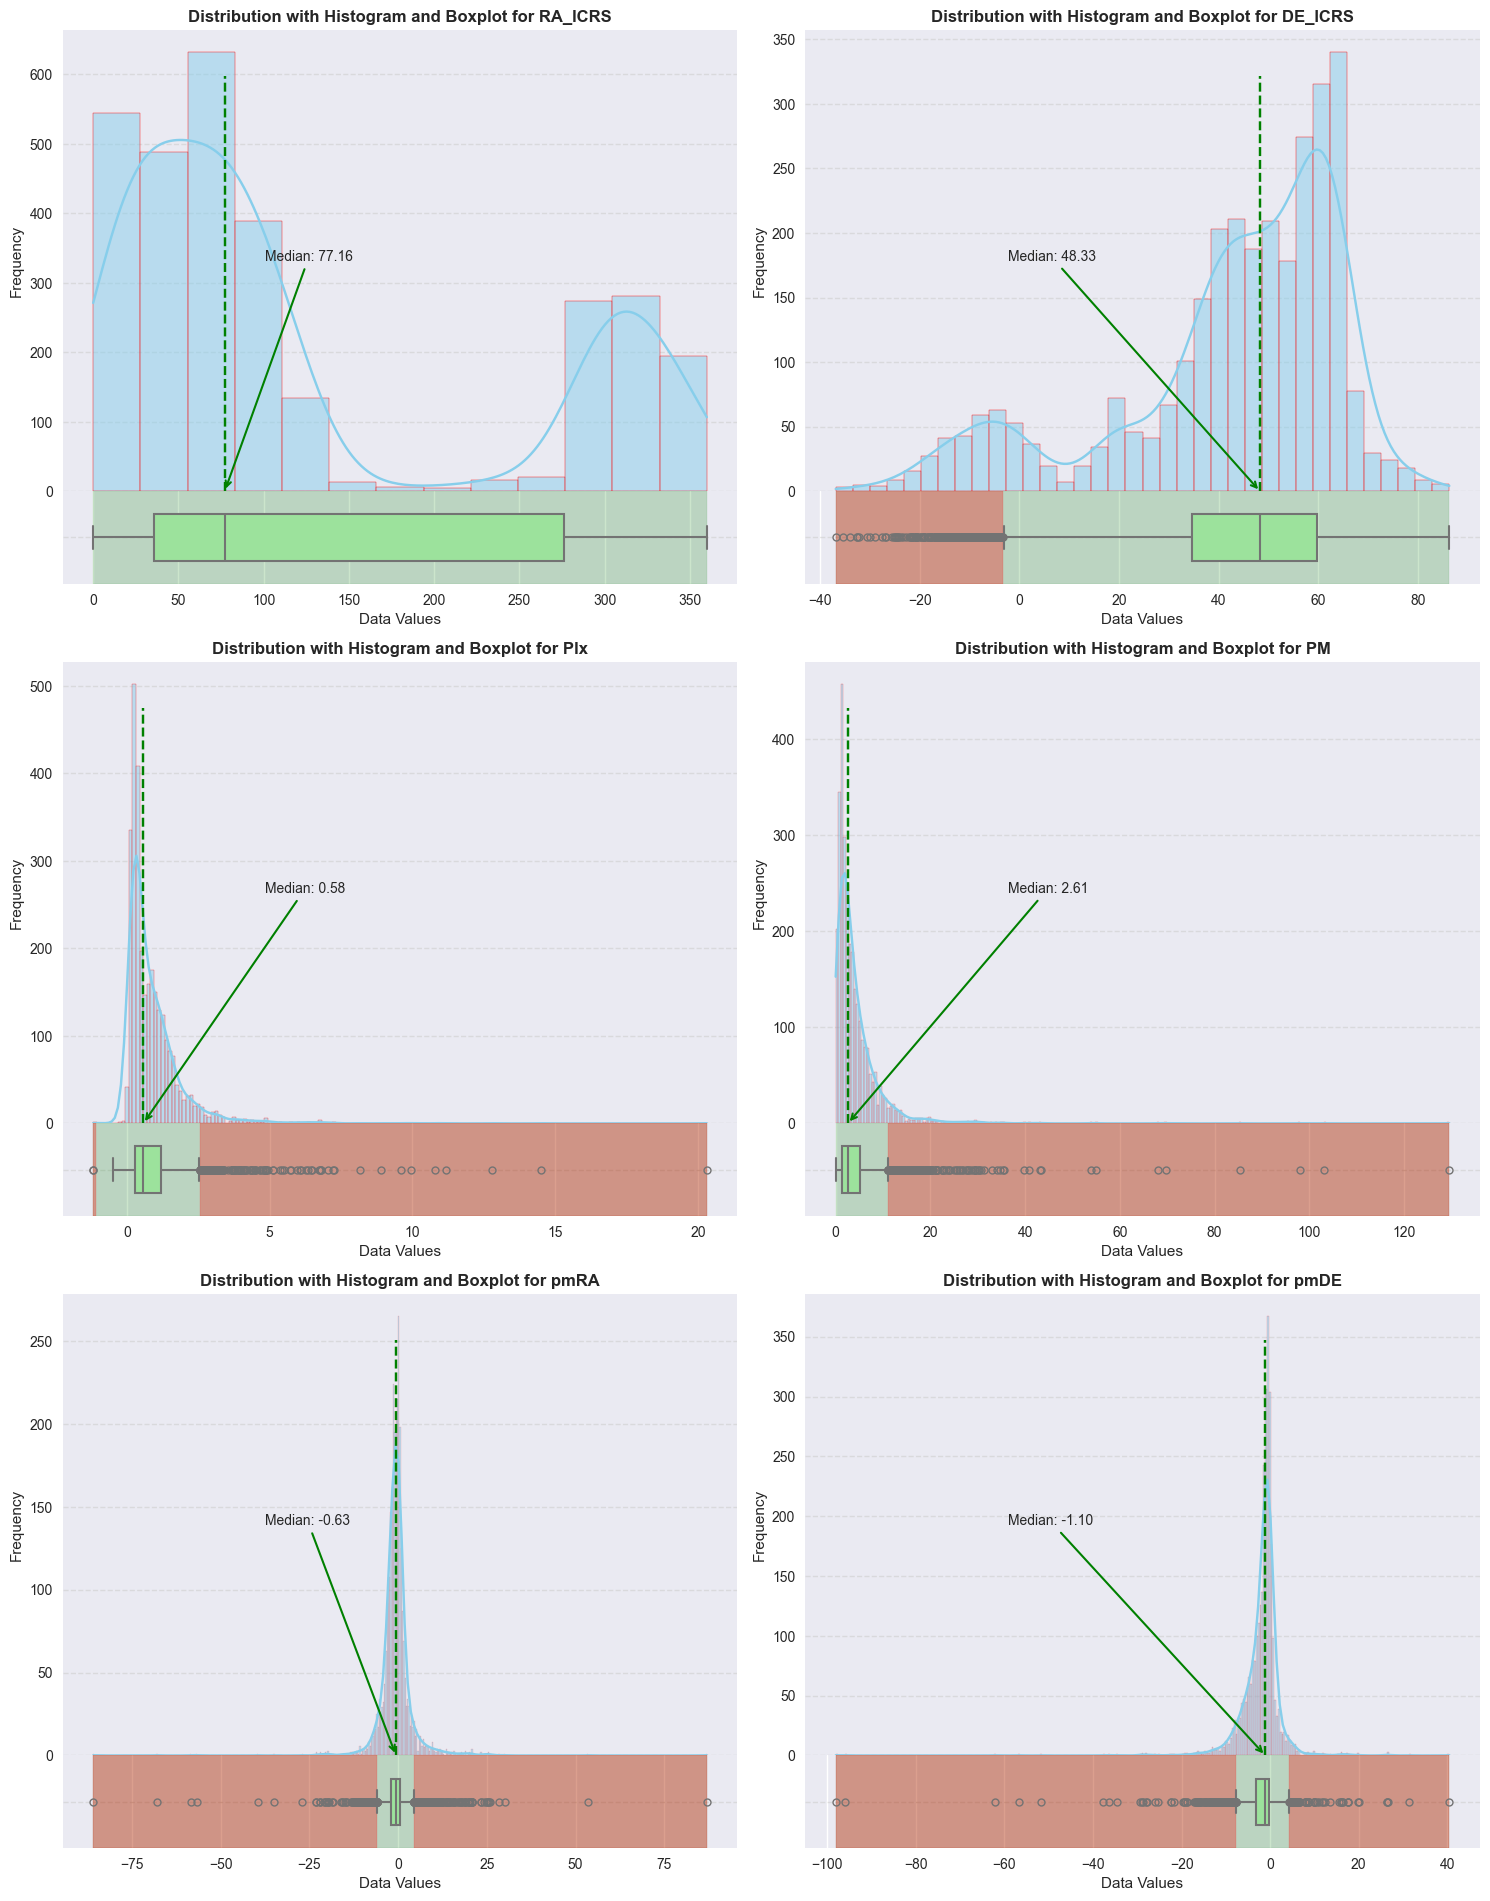

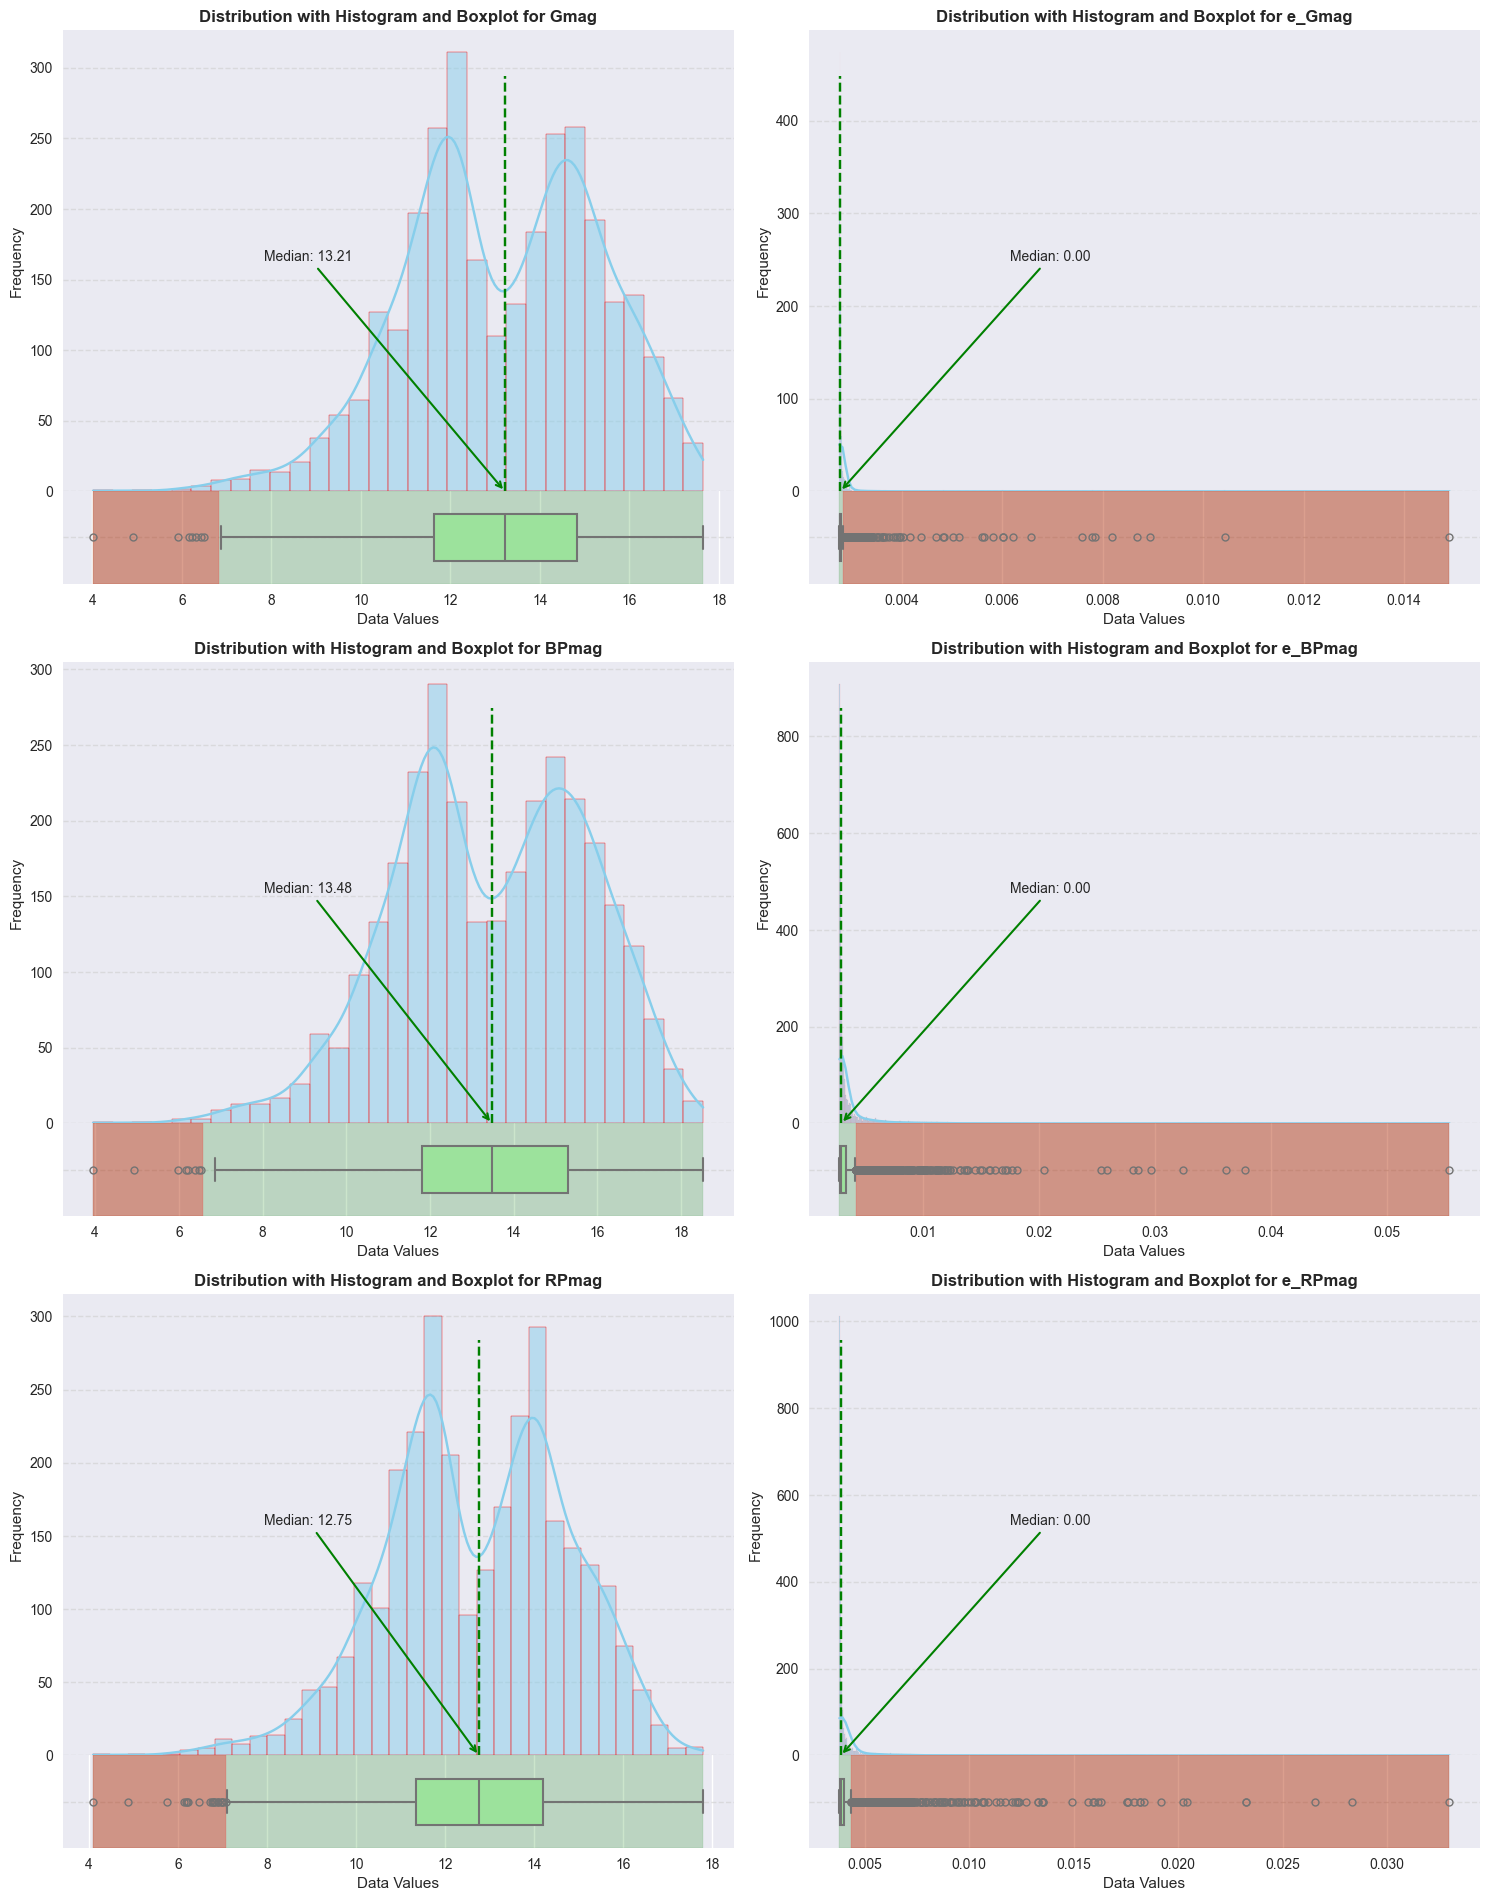

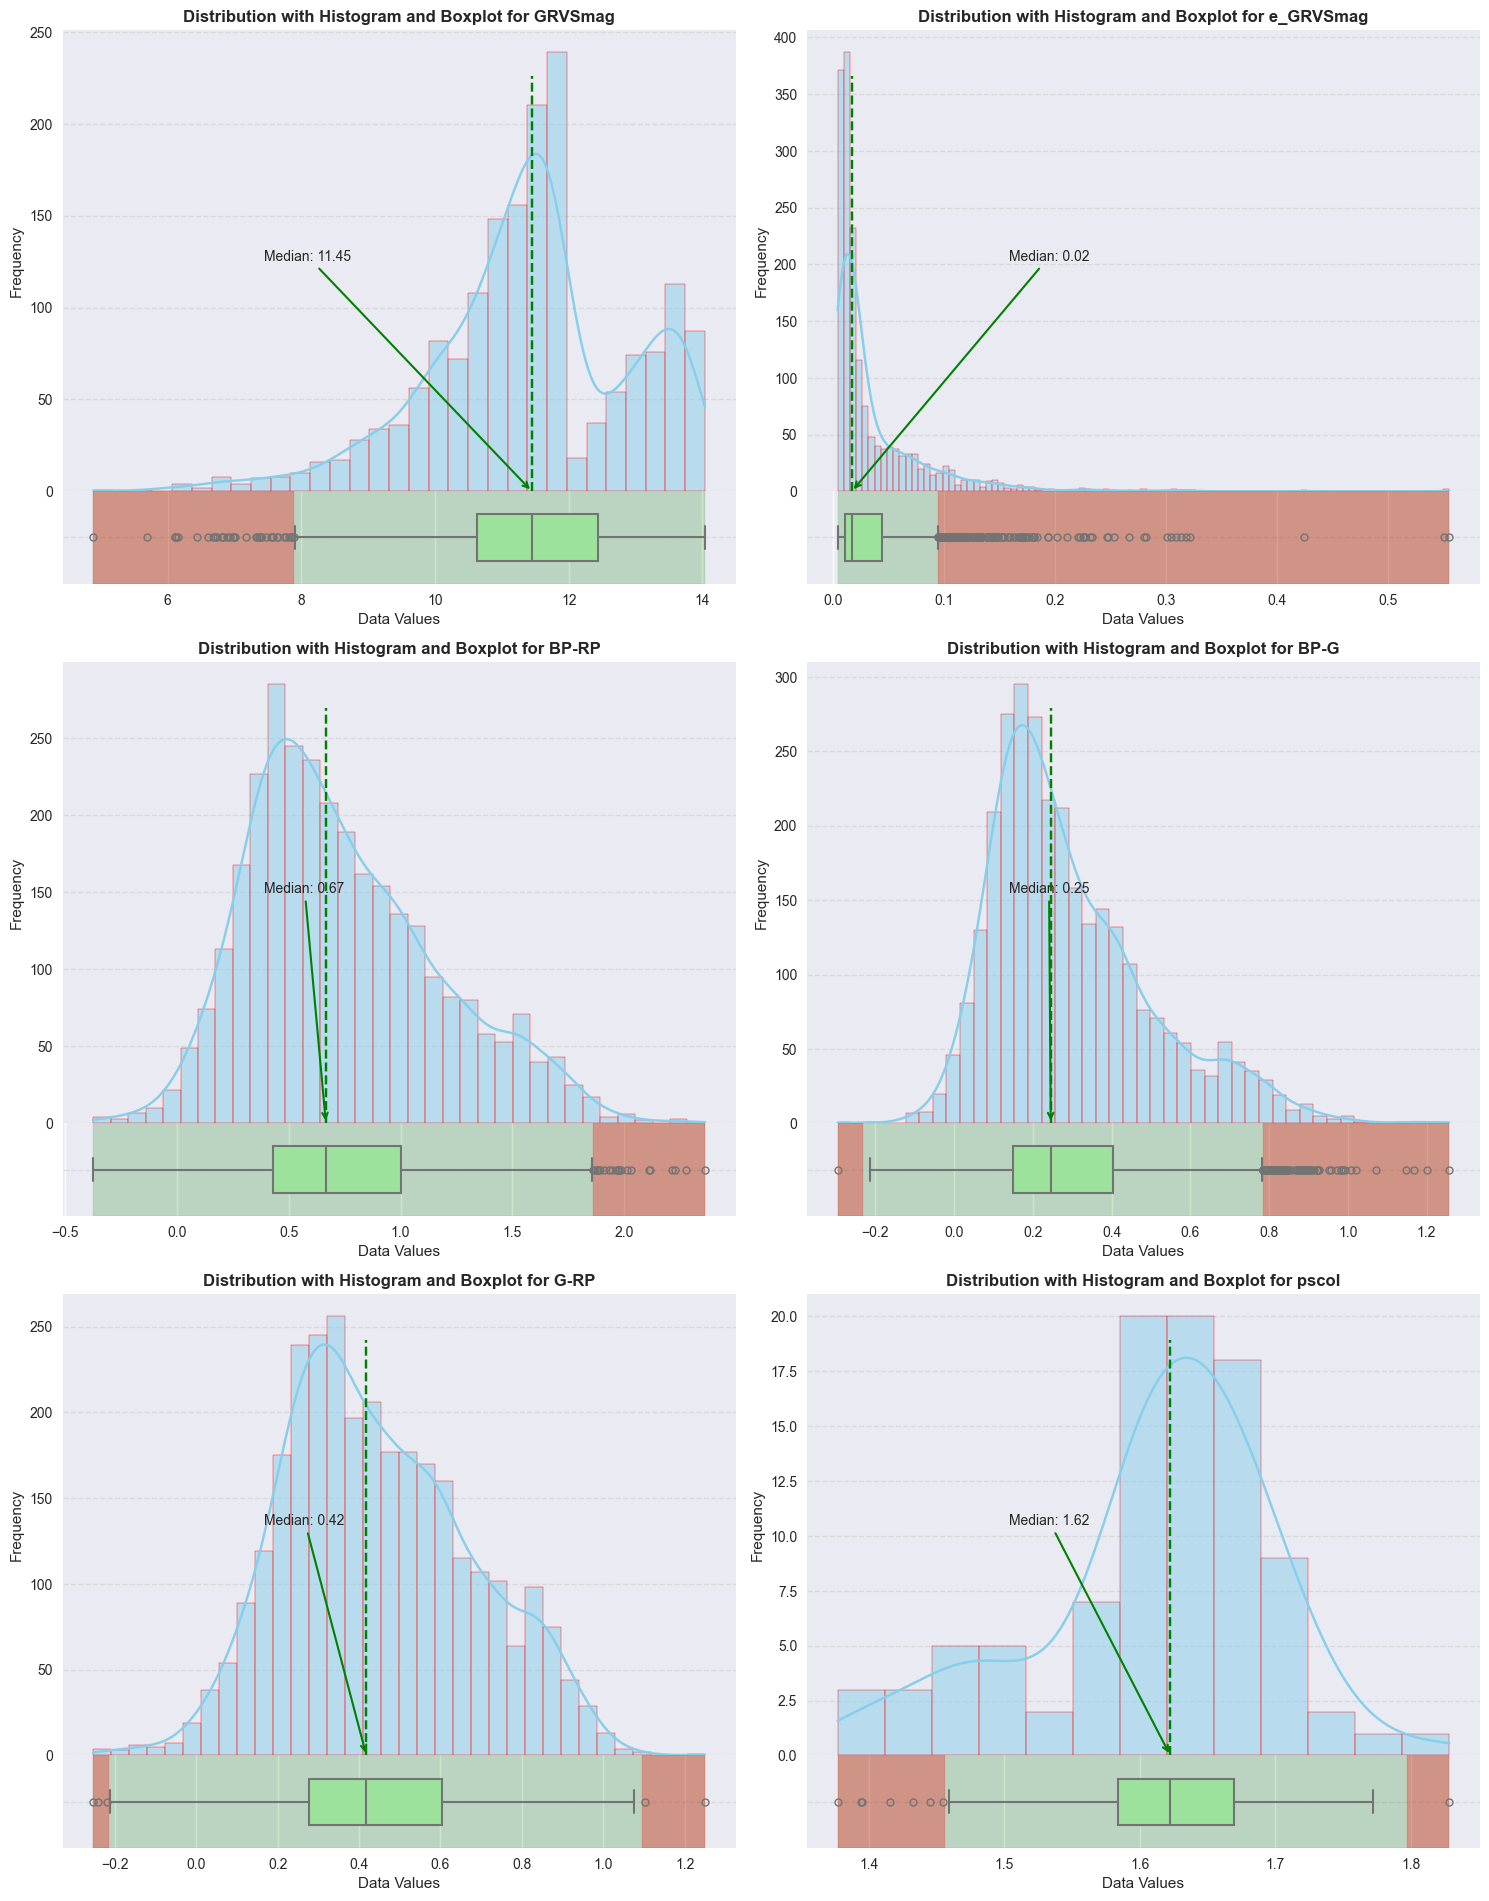

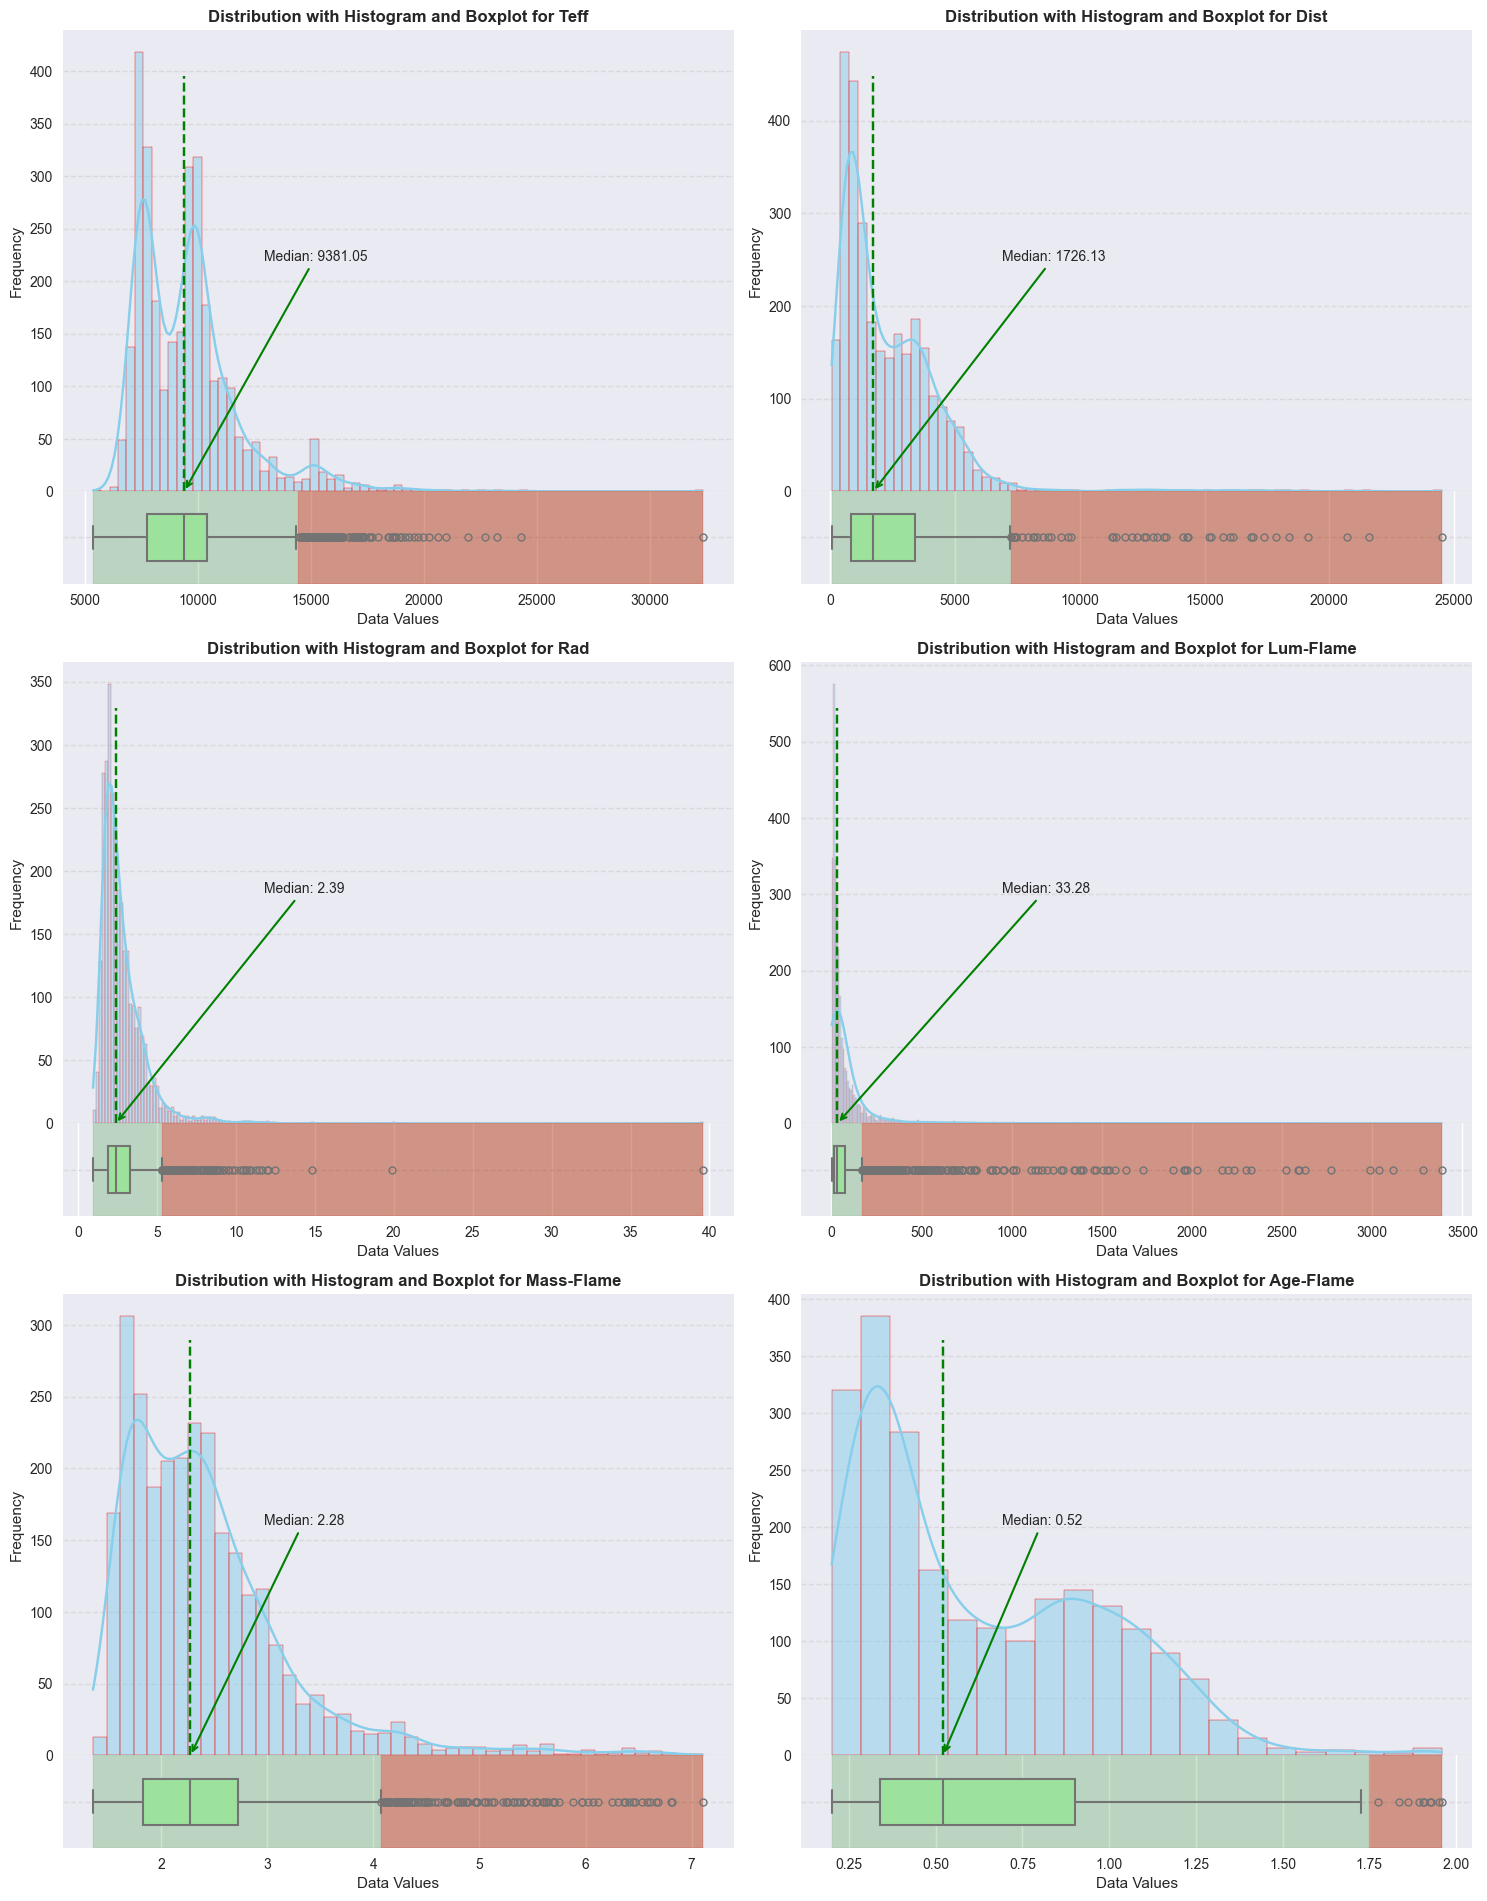

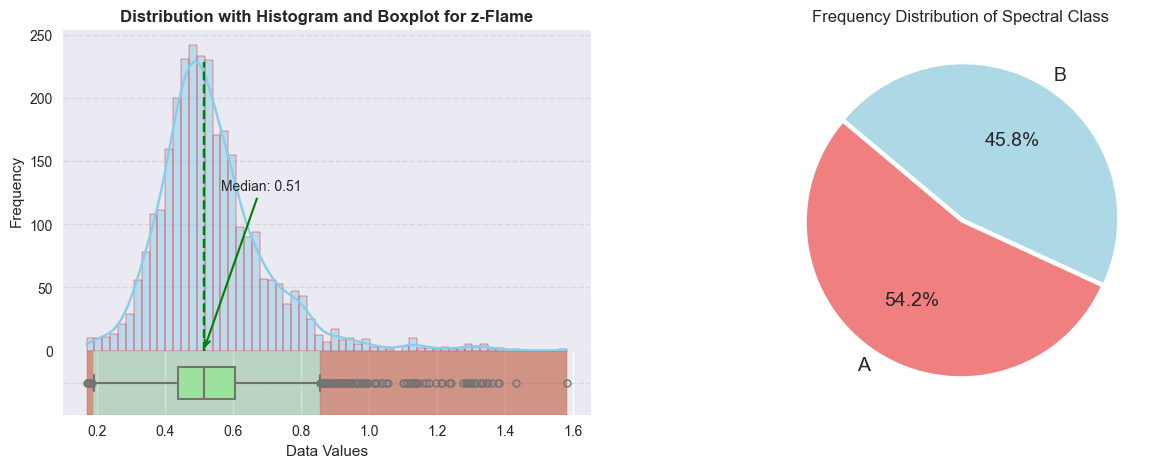

In [6]:
for i in range(0, len(X.columns[:24]), 6):
    hist_box_plot((15, 25), X, X.columns[i:i+6], ncols=2)

fig, outer_grid = hist_box_plot((15, 5), X, X.columns[24:], ncols=2, plt_show=False)
sp_type_counts = Y.value_counts()
ax2 = fig.add_subplot(outer_grid[-1])
ax2.pie(
    sp_type_counts, 
    labels = sp_type_counts.index, 
    colors = ['lightcoral', 'lightblue'], 
    explode = (0, 0.03), 
    autopct = '%1.1f%%', 
    startangle = 140, 
    textprops = {'fontsize': 14}
)
ax2.set_title('Frequency Distribution of Spectral Class')
plt.show()

In [7]:
# https://jila.colorado.edu/~ajsh/courses/astr1200_18/star.html
main_seq_labels = [
    'M: <=3700K', 'K: 3700-5200', 'G: 5200-6000K', 'F: 6000-7500K', 
    'A: 7500-10000K', 'B: 10000-30000K', 'O: >=30000K'
]
main_seq_bins = [-np.inf, 3700, 5200, 6000, 7500, 10000, 30000, np.inf]
pd.cut(
    X['Teff'], include_lowest=True, right=False, 
    bins=main_seq_bins, labels=main_seq_labels
).value_counts()

Teff
A: 7500-10000K     1492
B: 10000-30000K     955
F: 6000-7500K       551
G: 5200-6000K         1
O: >=30000K           1
M: <=3700K            0
K: 3700-5200          0
Name: count, dtype: int64

In [8]:
pd.cut(
    X['Dist'], include_lowest=True, right=False, 
    bins=[-np.inf, 100, 500, 1000, 5000, 10000, np.inf] # Distance in parsecs
).value_counts()

Dist
[1000.0, 5000.0)     1821
[500.0, 1000.0)       692
[100.0, 500.0)        259
[5000.0, 10000.0)     193
[10000.0, inf)         29
[-inf, 100.0)           6
Name: count, dtype: int64

### III. Relationship exploration
- Multiple attributes relationship of your dataset.
- Clusters of similar instances, "interesting" attributes and specific values of those attributes. 
- Note that you may need to 'temporarily' recode attributes to numeric or from numeric to nominal. 

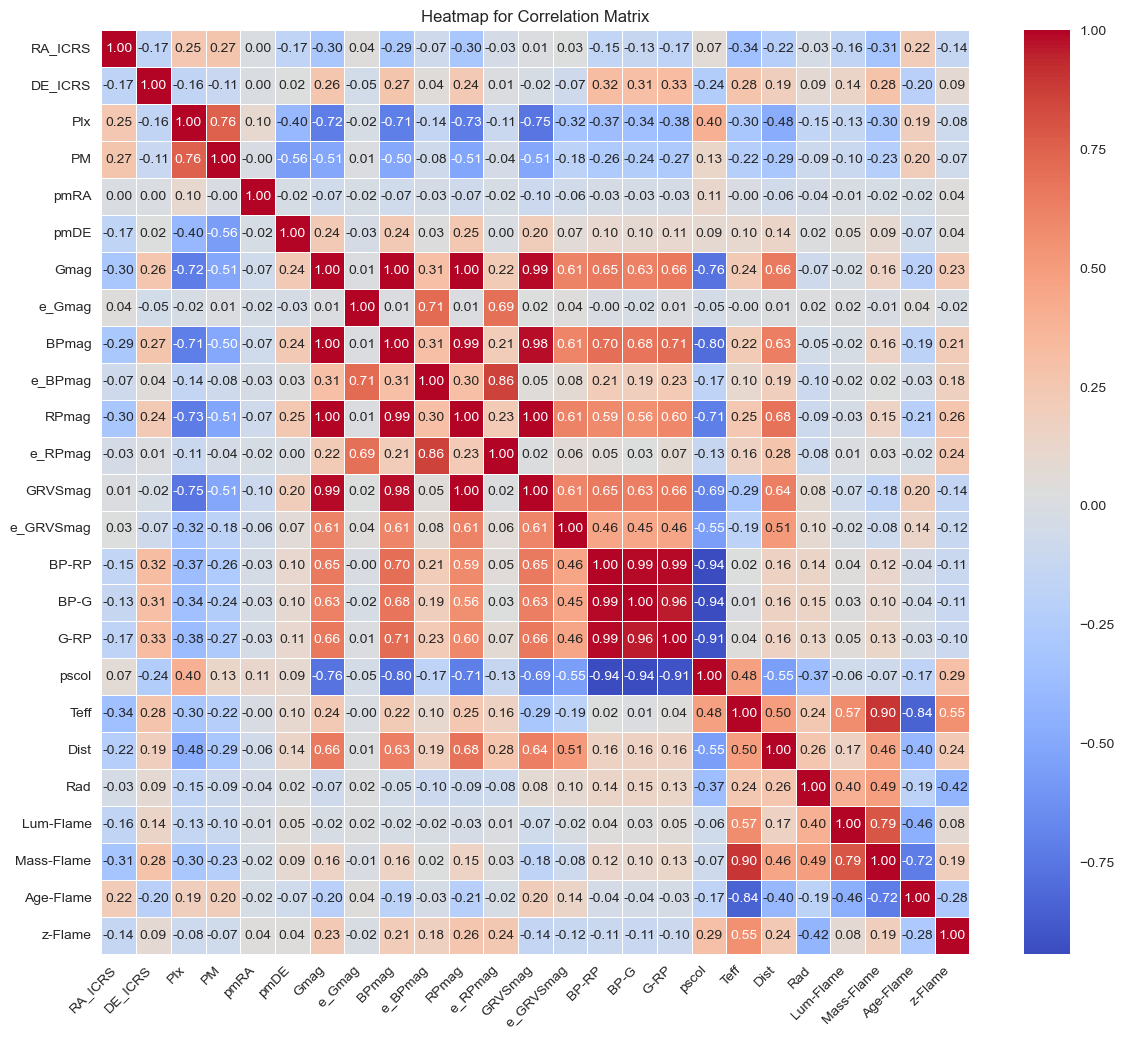

In [9]:
corr_matrix = X.select_dtypes(include=[np.number]).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1) # Generate a mask for the upper triangle

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.xticks(rotation=45, ha="right")
plt.title('Heatmap for Correlation Matrix')
plt.show()

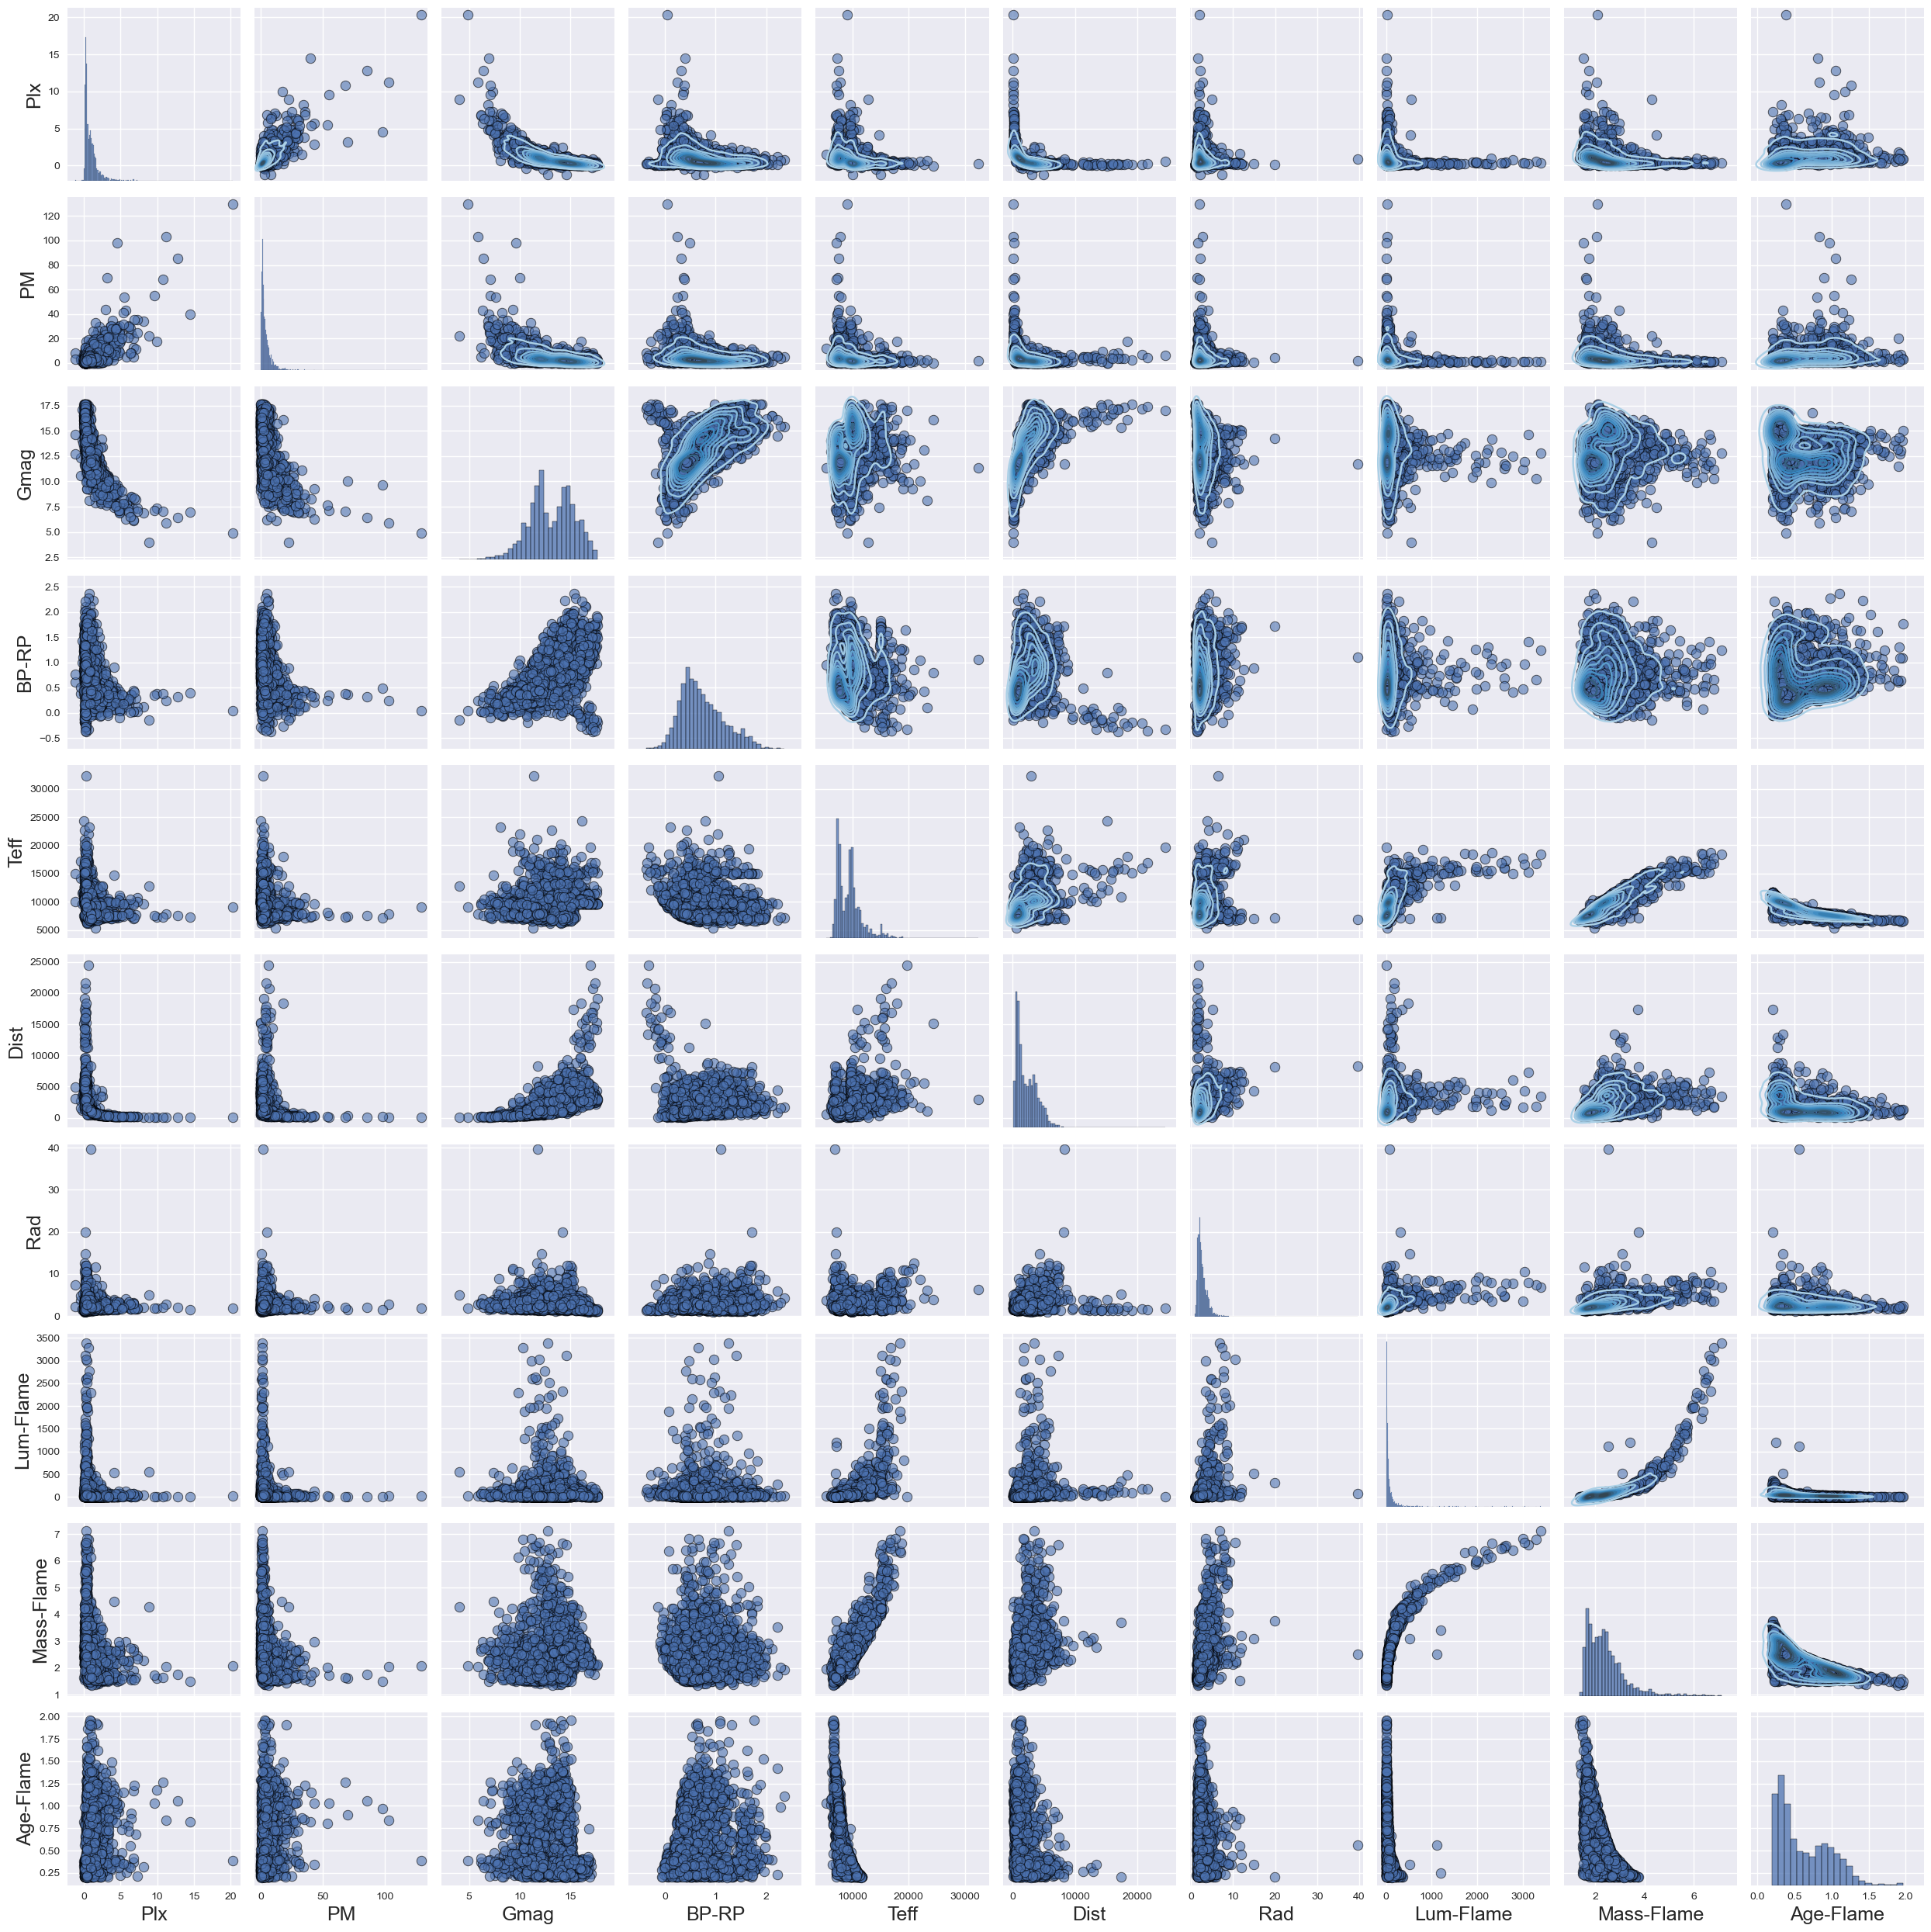

In [24]:
g = sns.pairplot(
    X[['Plx', 'PM', 'Gmag', 'BP-RP', 'Teff', 'Dist', 'Rad', 'Lum-Flame', 'Mass-Flame', 'Age-Flame']], 
    palette = sns.cubehelix_palette(8, start=.5, rot=-.75, as_cmap=True), # Create a custom color palette
    plot_kws = {'alpha':0.6, 's':80, 'edgecolor':'k'}, 
)

g.map_upper(sns.kdeplot, cmap="Blues_d") # Adjust the top right plot to have a different kind of plot, if necessary
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    
plt.tight_layout()
plt.show()

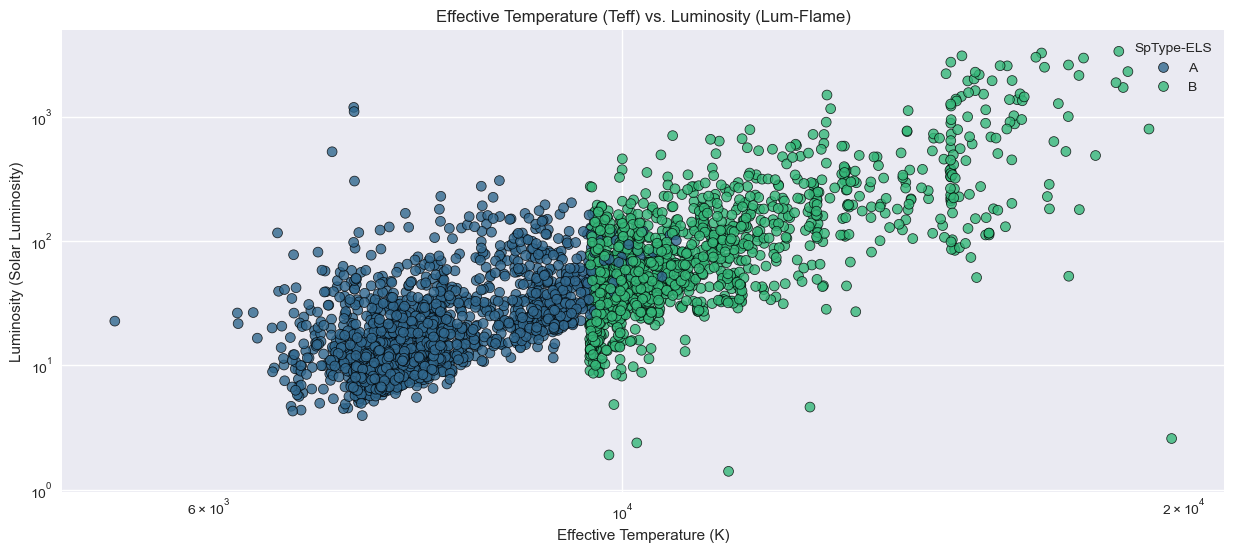

In [11]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Teff', y='Lum-Flame', data=X, hue=Y, palette='viridis', edgecolor='k', s=50, alpha=0.8)
plt.title('Effective Temperature (Teff) vs. Luminosity (Lum-Flame)')
plt.xlabel('Effective Temperature (K)')
plt.ylabel('Luminosity (Solar Luminosity)')

# Logarithmic scales on both axes helps visualize the wide range of values and the multiplicative relationship. 
# This scaling is crucial for handling the significant variance in stellar properties across the dataset.
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

### IV. Smoothing for RA_ICRS and DE_ICRS

#### 1. Equi-width (Equal-interval) Binning 

In [33]:
# Preparing for Equi-width binning
bins_ra_equiwidth = 24  # 24 bins for RA_ICRS
bins_de_equiwidth = 18  # 18 bins for DE_ICRS

In [34]:
X['RA_ICRS_EquiWidth_Bin'] = pd.cut(X['RA_ICRS'], bins=bins_ra_equiwidth, include_lowest=True)
X['RA_ICRS_EquiWidth_Bin'] = X['RA_ICRS_EquiWidth_Bin'].cat.rename_categories([
    f'Bin {i + 1}: {interval}' 
    for i, interval in enumerate(X['RA_ICRS_EquiWidth_Bin'].cat.categories)
])
ra_icrs_equiwidth_stats = X.groupby('RA_ICRS_EquiWidth_Bin')['RA_ICRS']\
    .agg(['min', 'max', 'mean', 'count'])\
    .rename(columns={'min': 'bin_min', 'max': 'bin_max', 'mean': 'bin_mean', 'count': 'bin_size'})
ra_icrs_equiwidth_stats

bin_min     bin_max    bin_mean  bin_size
RA_ICRS_EquiWidth_Bin                                                   
Bin 1: (-0.304, 15.052]       0.056661   15.026099    7.630146       280
Bin 2: (15.052, 30.048]      15.067836   30.033446   23.459322       331
Bin 3: (30.048, 45.044]      30.077667   45.031178   37.069460       313
Bin 4: (45.044, 60.04]       45.180042   59.984370   53.188644       178
Bin 5: (60.04, 75.036]       60.068962   75.033579   68.286941       328
Bin 6: (75.036, 90.031]      75.074498   89.723854   80.442088       306
Bin 7: (90.031, 105.027]     90.034653  104.863268   99.387881       184
Bin 8: (105.027, 120.023]   105.036853  119.870161  110.841191       231
Bin 9: (120.023, 135.019]   120.064384  134.594113  124.995206        35
Bin 10: (135.019, 150.015]  136.229195  149.874372  142.123304        11
Bin 11: (150.015, 165.01]   150.516126  154.634432  152.329009         5
Bin 12: (165.01, 180.006]   171.967711  171.967711  171.967711         1
Bin 13: (180.006, 195.002]  182.322442  194.062293  186.631208         6
Bin 14: (195.002, 209.998]  197.066600  197.066600  197.066600         1
Bin 15: (209.998, 224.994]  211.567141  223.147460  218.559869         5
Bin 16: (224.994, 239.989]  227.288142  238.325075  231.178218        11
Bin 17: (239.989, 254.985]  240.660401  253.928829  247.343292         9
Bin 18: (254.985, 269.981]  259.098175  269.596745  262.041656        11
Bin 19: (269.981, 284.977]  271.134144  284.583553  279.982496        24
Bin 20: (284.977, 299.973]  285.835636  299.882868  295.056120       171
Bin 21: (299.973, 314.968]  300.137941  314.927927  306.607676       201
Bin 22: (314.968, 329.964]  314.976559  329.871320  322.218169       142
Bin 23: (329.964, 344.96]   329.972418  344.846893  336.963167       111
Bin 24: (344.96, 359.956]   344.976732  359.955738  351.800714       105

In [15]:
X[['RA_ICRS', 'RA_ICRS_EquiWidth_Bin']]\
    .merge(ra_icrs_equiwidth_stats, on='RA_ICRS_EquiWidth_Bin')\
    .sort_values('RA_ICRS')

RA_ICRS      RA_ICRS_EquiWidth_Bin     bin_min     bin_max  \
2071    0.056661    Bin 1: (-0.304, 15.052]    0.056661   15.026099   
2075    0.120534    Bin 1: (-0.304, 15.052]    0.056661   15.026099   
1997    0.126239    Bin 1: (-0.304, 15.052]    0.056661   15.026099   
2047    0.202935    Bin 1: (-0.304, 15.052]    0.056661   15.026099   
1952    0.210756    Bin 1: (-0.304, 15.052]    0.056661   15.026099   
...          ...                        ...         ...         ...   
2835  358.630830  Bin 24: (344.96, 359.956]  344.976732  359.955738   
2848  359.005901  Bin 24: (344.96, 359.956]  344.976732  359.955738   
2838  359.366908  Bin 24: (344.96, 359.956]  344.976732  359.955738   
2837  359.474779  Bin 24: (344.96, 359.956]  344.976732  359.955738   
2895  359.955738  Bin 24: (344.96, 359.956]  344.976732  359.955738   

        bin_mean  bin_size  
2071    7.630146       280  
2075    7.630146       280  
1997    7.630146       280  
2047    7.630146       280  
1952    7.630146       280  
...          ...       ...  
2835  351.800714       105  
2848  351.800714       105  
2838  351.800714       105  
2837  351.800714       105  
2895  351.800714       105  

[3000 rows x 6 columns]

In [35]:
X['DE_ICRS_EquiWidth_Bin'] = pd.cut(X['DE_ICRS'], bins=bins_de_equiwidth, include_lowest=True)
X['DE_ICRS_EquiWidth_Bin'] = X['DE_ICRS_EquiWidth_Bin'].cat.rename_categories([
    f'Bin {i + 1}: {interval}' 
    for i, interval in enumerate(X['DE_ICRS_EquiWidth_Bin'].cat.categories)
])
de_icrs_equiwidth_stats = X.groupby('DE_ICRS_EquiWidth_Bin')['DE_ICRS']\
    .agg(['min', 'max', 'mean', 'count'])\
    .rename(columns={'min': 'bin_min', 'max': 'bin_max', 'mean': 'bin_mean', 'count': 'bin_size'})
de_icrs_equiwidth_stats

bin_min    bin_max   bin_mean  bin_size
DE_ICRS_EquiWidth_Bin                                               
Bin 1: (-36.961, -29.995] -36.836939 -30.024048 -33.012212         8
Bin 2: (-29.995, -23.153] -29.025192 -23.398555 -25.441197        13
Bin 3: (-23.153, -16.31]  -22.800680 -16.314553 -18.909556        43
Bin 4: (-16.31, -9.468]   -16.221155  -9.492822 -12.892364        84
Bin 5: (-9.468, -2.626]    -9.455728  -2.644397  -5.993829       122
Bin 6: (-2.626, 4.216]     -2.598615   4.181907   0.217255        90
Bin 7: (4.216, 11.058]      4.229728  10.820982   6.676293        27
Bin 8: (11.058, 17.9]      11.303179  17.897458  15.103663        54
Bin 9: (17.9, 24.743]      17.902774  24.582772  20.950715       118
Bin 10: (24.743, 31.585]   24.878072  31.565620  28.777791       108
Bin 11: (31.585, 38.427]   31.617043  38.417112  35.476411       250
Bin 12: (38.427, 45.269]   38.449678  45.259455  41.832473       414
Bin 13: (45.269, 52.111]   45.282817  52.038592  48.749401       397
Bin 14: (52.111, 58.953]   52.112991  58.952519  55.913396       452
Bin 15: (58.953, 65.795]   58.983512  65.744911  62.310084       655
Bin 16: (65.795, 72.638]   65.816492  72.336955  68.296244       108
Bin 17: (72.638, 79.48]    72.776297  79.147266  75.608416        42
Bin 18: (79.48, 86.322]    79.954977  86.321954  82.386341        15

In [36]:
X[['DE_ICRS', 'DE_ICRS_EquiWidth_Bin']]\
    .merge(de_icrs_equiwidth_stats, on='DE_ICRS_EquiWidth_Bin')\
    .sort_values('DE_ICRS')

DE_ICRS      DE_ICRS_EquiWidth_Bin    bin_min    bin_max   bin_mean  \
2968 -36.836939  Bin 1: (-36.961, -29.995] -36.836939 -30.024048 -33.012212   
2971 -35.472313  Bin 1: (-36.961, -29.995] -36.836939 -30.024048 -33.012212   
2967 -34.019772  Bin 1: (-36.961, -29.995] -36.836939 -30.024048 -33.012212   
2970 -32.571064  Bin 1: (-36.961, -29.995] -36.836939 -30.024048 -33.012212   
2966 -32.505914  Bin 1: (-36.961, -29.995] -36.836939 -30.024048 -33.012212   
...         ...                        ...        ...        ...        ...   
2982  84.847554    Bin 18: (79.48, 86.322]  79.954977  86.321954  82.386341   
2972  84.852630    Bin 18: (79.48, 86.322]  79.954977  86.321954  82.386341   
2973  85.285817    Bin 18: (79.48, 86.322]  79.954977  86.321954  82.386341   
2977  85.704616    Bin 18: (79.48, 86.322]  79.954977  86.321954  82.386341   
2980  86.321954    Bin 18: (79.48, 86.322]  79.954977  86.321954  82.386341   

      bin_size  
2968         8  
2971         8  
2967         8  
2970         8  
2966         8  
...        ...  
2982        15  
2972        15  
2973        15  
2977        15  
2980        15  

[3000 rows x 6 columns]

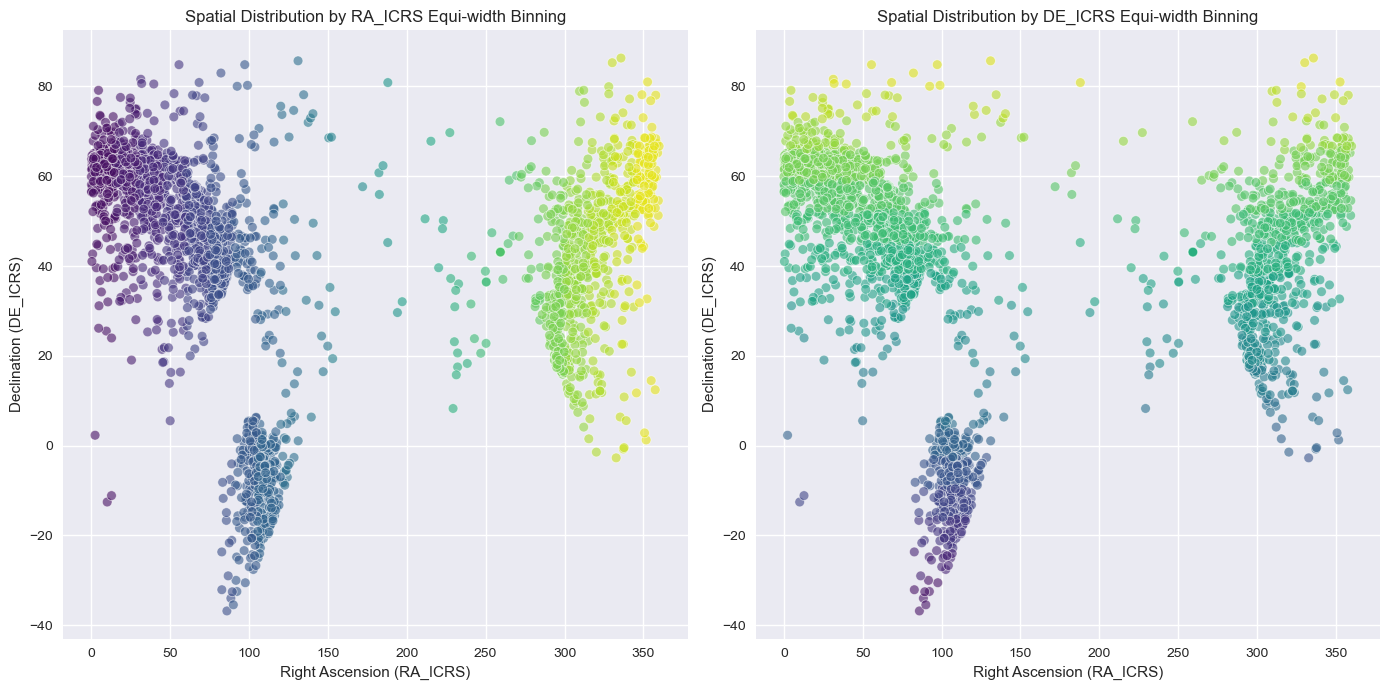

In [18]:
# Visualize the spatial distribution with Equi-width binning
plt.figure(figsize=(14, 7))

# RA_ICRS Equi-width
plt.subplot(1, 2, 1)
sns.scatterplot(x='RA_ICRS', y='DE_ICRS', hue='RA_ICRS_EquiWidth_Bin', data=X, palette='viridis', legend=None, alpha=0.6)
plt.title('Spatial Distribution by RA_ICRS Equi-width Binning')
plt.xlabel('Right Ascension (RA_ICRS)')
plt.ylabel('Declination (DE_ICRS)')

# DE_ICRS Equi-width
plt.subplot(1, 2, 2)
sns.scatterplot(x='RA_ICRS', y='DE_ICRS', hue='DE_ICRS_EquiWidth_Bin', data=X, palette='viridis', legend=None, alpha=0.6)
plt.title('Spatial Distribution by DE_ICRS Equi-width Binning')
plt.xlabel('Right Ascension (RA_ICRS)')
plt.ylabel('Declination (DE_ICRS)')

plt.tight_layout()
plt.show()

#### 2.	Equi-depth (Equal-frequency) Binning 

In [37]:
# Preparing for Equi-depth binning
bins_ra_equidepth = 24  # Matching the equi-width for comparison
bins_de_equidepth = 18  # Matching the equi-width for comparison

In [38]:
X['RA_ICRS_EquiDepth_Bin'] = pd.qcut(X['RA_ICRS'], q=bins_ra_equidepth)
X['RA_ICRS_EquiDepth_Bin'] = X['RA_ICRS_EquiDepth_Bin'].cat.rename_categories([
    f'Bin {i + 1}: {interval}' 
    for i, interval in enumerate(X['RA_ICRS_EquiDepth_Bin'].cat.categories)
])
ra_icrs_equidepth_stats = X.groupby('RA_ICRS_EquiDepth_Bin')['RA_ICRS']\
    .agg(['min', 'max', 'mean', 'count'])\
    .rename(columns={'min': 'bin_min', 'max': 'bin_max', 'mean': 'bin_mean', 'count': 'bin_size'})
ra_icrs_equidepth_stats

bin_min     bin_max    bin_mean  bin_size
RA_ICRS_EquiDepth_Bin                                                   
Bin 1: (0.0557, 6.622]        0.056661    6.480101    3.270302       125
Bin 2: (6.622, 13.831]        6.628199   13.760977   10.371937       125
Bin 3: (13.831, 20.621]      13.837377   20.588782   17.298099       125
Bin 4: (20.621, 26.0]        20.626016   25.982600   23.415338       125
Bin 5: (26.0, 30.561]        26.003655   30.542909   28.250420       125
Bin 6: (30.561, 35.586]      30.565580   35.531030   33.326660       125
Bin 7: (35.586, 42.099]      35.603699   42.082331   39.088483       125
Bin 8: (42.099, 51.916]      42.105922   51.910594   46.579429       125
Bin 9: (51.916, 61.082]      51.918936   61.054705   57.311828       125
Bin 10: (61.082, 68.186]     61.098298   68.174496   64.615772       125
Bin 11: (68.186, 72.973]     68.193959   72.957977   70.894654       125
Bin 12: (72.973, 77.161]     72.986508   77.095388   75.124538       125
Bin 13: (77.161, 81.193]     77.226938   81.176071   79.180417       125
Bin 14: (81.193, 92.473]     81.212834   92.469999   85.405737       125
Bin 15: (92.473, 103.024]    92.477042  102.992217   98.626198       125
Bin 16: (103.024, 108.335]  103.076236  108.307627  105.778280       125
Bin 17: (108.335, 116.166]  108.389417  116.160821  112.012218       125
Bin 18: (116.166, 275.965]  116.178019  275.619782  168.663714       125
Bin 19: (275.965, 296.023]  277.000016  296.009398  291.359281       125
Bin 20: (296.023, 303.244]  296.073953  303.230186  299.630992       125
Bin 21: (303.244, 313.616]  303.312394  313.605562  307.959367       125
Bin 22: (313.616, 325.809]  313.686982  325.807549  319.548268       125
Bin 23: (325.809, 341.539]  325.820968  341.537680  333.548892       125
Bin 24: (341.539, 359.956]  341.572848  359.955738  350.412180       125

In [39]:
X[['RA_ICRS', 'RA_ICRS_EquiDepth_Bin']]\
    .merge(ra_icrs_equidepth_stats, on='RA_ICRS_EquiDepth_Bin')\
    .sort_values('RA_ICRS')

RA_ICRS       RA_ICRS_EquiDepth_Bin     bin_min     bin_max  \
2359    0.056661      Bin 1: (0.0557, 6.622]    0.056661    6.480101   
2361    0.120534      Bin 1: (0.0557, 6.622]    0.056661    6.480101   
2326    0.126239      Bin 1: (0.0557, 6.622]    0.056661    6.480101   
2349    0.202935      Bin 1: (0.0557, 6.622]    0.056661    6.480101   
2305    0.210756      Bin 1: (0.0557, 6.622]    0.056661    6.480101   
...          ...                         ...         ...         ...   
1513  358.630830  Bin 24: (341.539, 359.956]  341.572848  359.955738   
1527  359.005901  Bin 24: (341.539, 359.956]  341.572848  359.955738   
1516  359.366908  Bin 24: (341.539, 359.956]  341.572848  359.955738   
1515  359.474779  Bin 24: (341.539, 359.956]  341.572848  359.955738   
1580  359.955738  Bin 24: (341.539, 359.956]  341.572848  359.955738   

        bin_mean  bin_size  
2359    3.270302       125  
2361    3.270302       125  
2326    3.270302       125  
2349    3.270302       125  
2305    3.270302       125  
...          ...       ...  
1513  350.412180       125  
1527  350.412180       125  
1516  350.412180       125  
1515  350.412180       125  
1580  350.412180       125  

[3000 rows x 6 columns]

<Axes: title={'center': 'Mean RA_ICRS by Equi-depth Binning'}, xlabel='RA_ICRS_EquiDepth_Bin'>

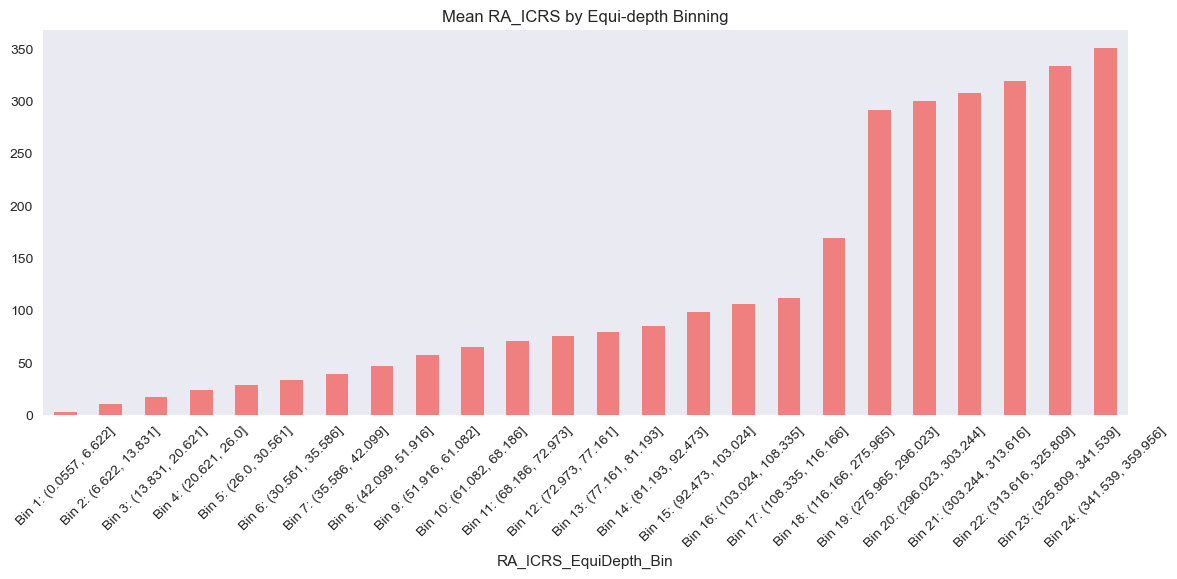

In [32]:
ra_icrs_equidepth_stats['bin_mean'].plot(
    kind='bar', figsize=(14, 5), fontsize=10, rot=45, 
    color='lightcoral', legend=None, grid=False, 
    title='Mean RA_ICRS by Equi-depth Binning'
)

In [40]:
X['DE_ICRS_EquiDepth_Bin'] = pd.qcut(X['DE_ICRS'], q=bins_de_equidepth)
X['DE_ICRS_EquiDepth_Bin'] = X['DE_ICRS_EquiDepth_Bin'].cat.rename_categories([
    f'Bin {i + 1}: {interval}' 
    for i, interval in enumerate(X['DE_ICRS_EquiDepth_Bin'].cat.categories)
])
de_icrs_equidepth_stats = X.groupby('DE_ICRS_EquiDepth_Bin')['DE_ICRS']\
    .agg(['min', 'max', 'mean', 'count'])\
    .rename(columns={'min': 'bin_min', 'max': 'bin_max', 'mean': 'bin_mean', 'count': 'bin_size'})
de_icrs_equidepth_stats

bin_min    bin_max   bin_mean  bin_size
DE_ICRS_EquiDepth_Bin                                              
Bin 1: (-36.838, -8.242] -36.836939  -8.247184 -15.917778       167
Bin 2: (-8.242, 1.425]    -8.238922   1.403917  -3.643614       167
Bin 3: (1.425, 20.62]      1.497284  20.571353  13.281094       166
Bin 4: (20.62, 31.588]    20.629553  31.565620  26.560105       167
Bin 5: (31.588, 36.932]   31.617043  36.930892  34.402979       167
Bin 6: (36.932, 39.891]   36.952916  39.887685  38.470356       166
Bin 7: (39.891, 42.446]   39.892593  42.436257  41.213454       167
Bin 8: (42.446, 45.286]   42.469997  45.285045  43.760790       166
Bin 9: (45.286, 48.327]   45.286433  48.314320  46.767169       167
Bin 10: (48.327, 51.174]  48.339553  51.170209  49.732106       167
Bin 11: (51.174, 53.909]  51.208755  53.902529  52.489188       166
Bin 12: (53.909, 56.887]  53.911837  56.875921  55.600325       167
Bin 13: (56.887, 58.809]  56.909859  58.806497  57.818204       166
Bin 14: (58.809, 60.717]  58.809229  60.715600  59.751927       167
Bin 15: (60.717, 62.42]   60.717624  62.417258  61.569910       167
Bin 16: (62.42, 63.701]   62.435643  63.700143  63.071472       166
Bin 17: (63.701, 65.682]  63.701541  65.659199  64.521984       167
Bin 18: (65.682, 86.322]  65.716883  86.321954  71.370088       167

In [24]:
X[['DE_ICRS', 'DE_ICRS_EquiDepth_Bin']]\
    .merge(de_icrs_equidepth_stats, on='DE_ICRS_EquiDepth_Bin')\
    .sort_values('DE_ICRS')

DE_ICRS     DE_ICRS_EquiDepth_Bin    bin_min    bin_max   bin_mean  \
411  -36.836939  Bin 1: (-36.838, -8.242] -36.836939  -8.247184 -15.917778   
472  -35.472313  Bin 1: (-36.838, -8.242] -36.836939  -8.247184 -15.917778   
404  -34.019772  Bin 1: (-36.838, -8.242] -36.836939  -8.247184 -15.917778   
455  -32.571064  Bin 1: (-36.838, -8.242] -36.836939  -8.247184 -15.917778   
382  -32.505914  Bin 1: (-36.838, -8.242] -36.836939  -8.247184 -15.917778   
...         ...                       ...        ...        ...        ...   
1111  84.847554  Bin 18: (65.682, 86.322]  65.716883  86.321954  71.370088   
1016  84.852630  Bin 18: (65.682, 86.322]  65.716883  86.321954  71.370088   
1025  85.285817  Bin 18: (65.682, 86.322]  65.716883  86.321954  71.370088   
1075  85.704616  Bin 18: (65.682, 86.322]  65.716883  86.321954  71.370088   
1094  86.321954  Bin 18: (65.682, 86.322]  65.716883  86.321954  71.370088   

      bin_size  
411        167  
472        167  
404        167  
455        167  
382        167  
...        ...  
1111       167  
1016       167  
1025       167  
1075       167  
1094       167  

[3000 rows x 6 columns]

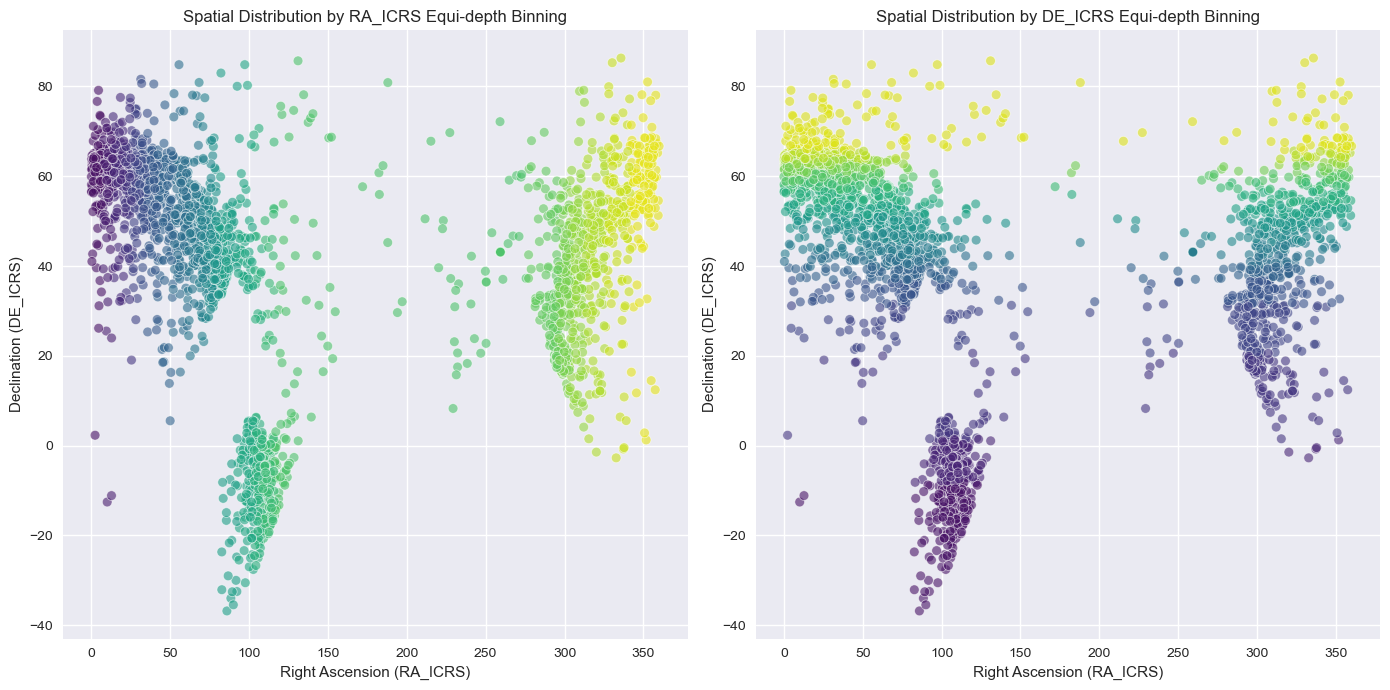

In [25]:
# Visualize the spatial distribution with Equi-depth binning
plt.figure(figsize=(14, 7))

# RA_ICRS Equi-depth
plt.subplot(1, 2, 1)
sns.scatterplot(x='RA_ICRS', y='DE_ICRS', hue='RA_ICRS_EquiDepth_Bin', data=X, palette='viridis', legend=None, alpha=0.6)
plt.title('Spatial Distribution by RA_ICRS Equi-depth Binning')
plt.xlabel('Right Ascension (RA_ICRS)')
plt.ylabel('Declination (DE_ICRS)')

# DE_ICRS Equi-depth
plt.subplot(1, 2, 2)
sns.scatterplot(x='RA_ICRS', y='DE_ICRS', hue='DE_ICRS_EquiDepth_Bin', data=X, palette='viridis', legend=None, alpha=0.6)
plt.title('Spatial Distribution by DE_ICRS Equi-depth Binning')
plt.xlabel('Right Ascension (RA_ICRS)')
plt.ylabel('Declination (DE_ICRS)')

plt.tight_layout()
plt.show()